In [184]:
import math,random
from scipy.stats import spearmanr

from tqdm.notebook import tqdm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [46]:
race_info = pd.read_csv('./data/race_info.csv')
race_info.dropna(subset=['3連単'], inplace=True)

In [47]:
def str2return(series):
    series = series.str.split('円').map(max)
    series = series.str.replace(',', '')
    series = series.astype(int)
    return series

race_info['3連単'] = str2return(race_info['3連単'])
race_info['3連複'] = str2return(race_info['3連複'])
race_info['単勝'] = str2return(race_info['単勝'])

In [48]:
def summary(series):
    print('\n', series.name)
    print('mean   : ', series.mean())
    print('median : ', series.median())
    print('std    : ', series.std())
    print('max    : ', series.max())
    print('min    : ', series.min())
    
summary(race_info['3連単'])
summary(race_info['単勝'])
summary(race_info['3連複'])


 3連単
mean   :  143382.7160434258
median :  28430.0
std    :  575267.8603981005
max    :  27929360
min    :  330

 単勝
mean   :  1033.567671893848
median :  490.0
std    :  1962.7480819295529
max    :  45010
min    :  110

 3連複
mean   :  22954.90132689988
median :  5350.0
std    :  85888.69493387728
max    :  5508830
min    :  130


In [69]:
race_info['date'] = race_info['date'].str.split('(').apply(lambda x: x[0])

def to_date(s):
    try:
        return dt.strptime(s, '%Y年%m月%d日')
    except:
        return dt.strptime(s, '%Y年%m/%d')

race_info['date'] = race_info['date'].map(to_date)

In [153]:
print(len(race_info))

race_df = pd.DataFrame()

for i, (race_id, date) in tqdm(enumerate(zip(race_info['race_id'], race_info['date']))):
    
    race_tmp = pd.read_csv(f'./data/race/{race_id}.csv').to_dict()
    race_tmp['horse'] = {}
    
    for j, horse_id in race_tmp['horse_id'].items():
        horse = pd.read_csv(f'./data/horse/{horse_id}.csv', index_col=0)
        horse['date'] = pd.to_datetime(horse['date'])
        horse = horse[horse['date']<date]
        
        race_tmp['horse'][j] = horse.to_dict()
        
    race_tmp = pd.DataFrame(race_tmp)
    race_tmp['race_id'] = race_id
    
    race_df = pd.concat([race_df, race_tmp], ignore_index=True)
    
race_df.dropna(subset=['popular', 'time'], inplace=True)
race_df = race_df[race_df['result']!='失格']

20725


0it [00:00, ?it/s]

rank corr : 0.5837368026308702


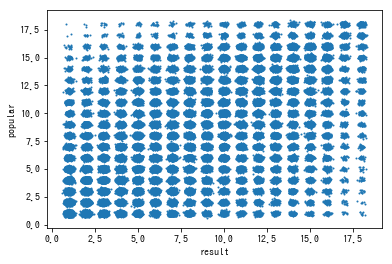

In [194]:
race_df['result'] = race_df['result'].astype(int)
race_df['popular'] = race_df['popular'].astype(int)

correlation, _ = spearmanr(race_df['result'], race_df['popular'])
print('rank corr :', correlation)

tmp = race_df[['result', 'popular']]
tmp['result'] = tmp['result'].apply(lambda x: x + random.normalvariate(0, 0.1))
tmp['popular'] = tmp['popular'].apply(lambda x: x + random.normalvariate(0, 0.1))

plt.scatter(tmp['result'], tmp['popular'], s=1)
plt.xlabel('result')
plt.ylabel('popular')
plt.show()

In [225]:
tmp = pd.DataFrame(race_df['horse'][0])

In [226]:
tmp['field'] = tmp['dist'].str[0]
tmp['dist'] = tmp['dist'].str[1:].astype(int)

In [229]:
f_dict = tmp['field'].value_counts().to_dict()

for d, c in f_dict.items():
    print(d, c)

ダ 3


In [230]:
tmp

,date,place,weather,name,waku,num,odds,pop,result,jockey,kinryou,dist,baba,time,sa,nobori,weight,field
36,2014-12-14,4中山4,晴,2歳未勝利,3,6,2.8,1,4,北村宏司,55,1200,良,1:13.8,0.9,39.9,490(-2),ダ
37,2014-11-24,5東京7,晴,2歳未勝利,5,10,13.9,6,2,北村宏司,55,1300,良,1:20.2,0.3,37.3,492(+26),ダ
38,2014-07-12,2福島3,晴,2歳新馬,3,6,4.3,2,4,北村宏司,54,1150,良,1:10.6,0.3,37.8,466(0),ダ
